# Time-Varying Effect of Financialization on Oil Futures

In [1]:
from utils.models import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


In [2]:
wti = clean_series('contract_1', load('data/WTI.csv').pct_change())

### S&P 500

The most interesting of markets studied is equity markets. Recent literature using panel regression suggests increased equity market risk (Isleimeyyeh, 2019), but the link between commodities and the equity market has been disputed (Daskalaki et al, 2014).

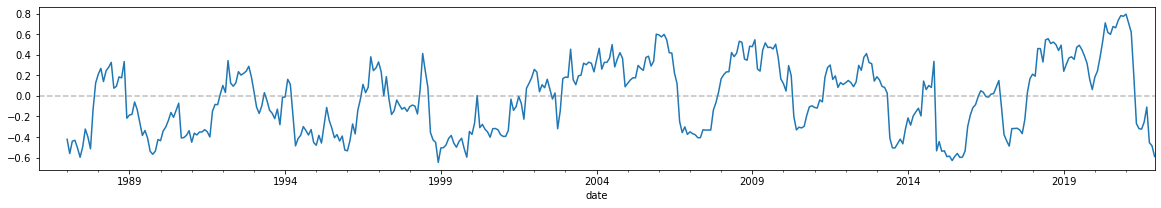

In [3]:
spx = clean_series('real', load('data/SP500.csv').pct_change())
rolling_corr(wti.join(spx).dropna())

### VXO

To backup our findings, let's look at impulse response to perceived short-term (30-day) equity market uncertainty. While the VIX is commonly used, it doesn't go back far enough for us to see the pre-financilization trend. Instead, the VXO will be used, which takes volatility from the S&P 100 index as opposed to the VIX's S&P 500. Nevertheless, the indices are similar enough.

If there is increased equity risk feeding into WTI from financialization, we'd expect to see stronger negative returns following VXO shocks.

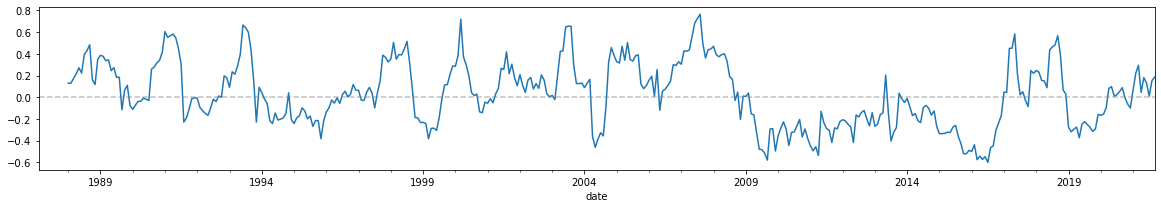

In [4]:
vxo_shocks = calc_shock('VXO', load('data/VXO.csv'))
rolling_corr(wti.join(vxo_shocks).dropna())

### MSCI World

The MSCI World index is comprised of equity indices from developed markets.

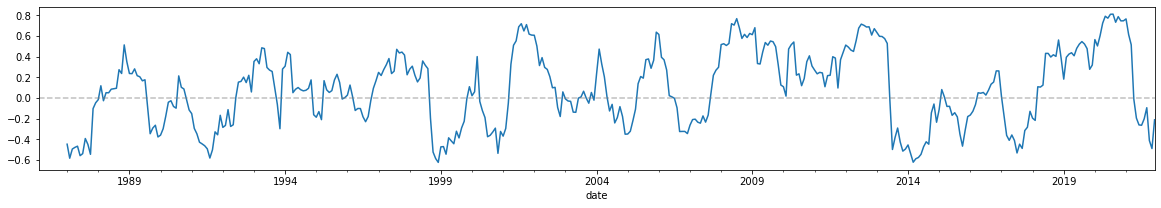

In [5]:
msci_world = clean_series('real', load('data/MSCI_World.csv').pct_change())
rolling_corr(wti.join(msci_world).dropna())

### MSCI Emerging Markets

As its name suggests, MSCI Emerging Markets (EM) is an index for emerging market equities.

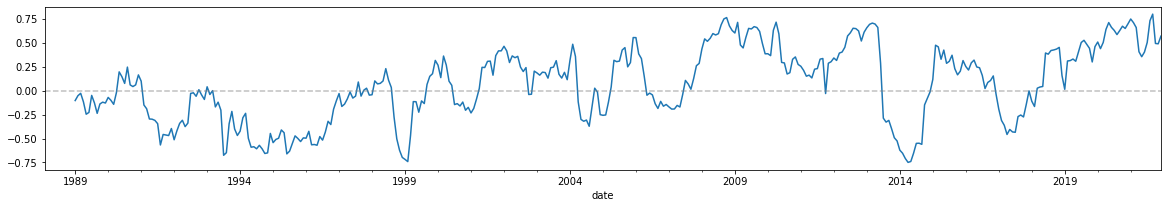

In [6]:
msci_em = clean_series('real', load('data/MSCI_EM.csv').pct_change())
rolling_corr(wti.join(msci_em).dropna())

A clear trend emerges from the MSCI indices for both the developed and developing equity markets - one that is robust to market cycles. Judging from the RMSE, the MSCI Emerging Markets index has a greater explainability for oil returns than the S&P 500 or MSCI World. The importance of developing market demand has been explored in Killian and Hicks (2013).

### Economic Policy Uncertainty

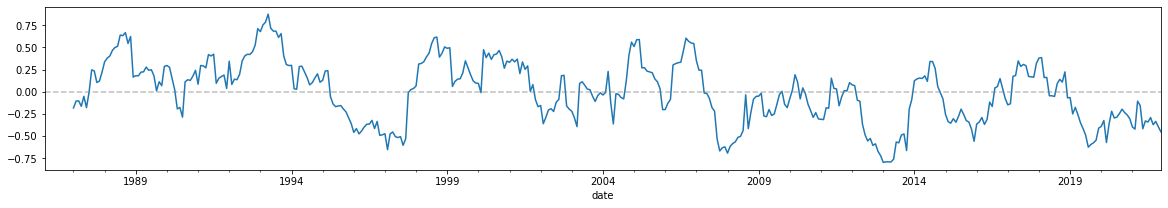

In [7]:
us_epu_shocks = calc_shock('aggregate', load('data/EPU_US.csv'))
us_epu_responses = rolling_corr(wti.join(us_epu_shocks).dropna())

### GSCI Non-Energy

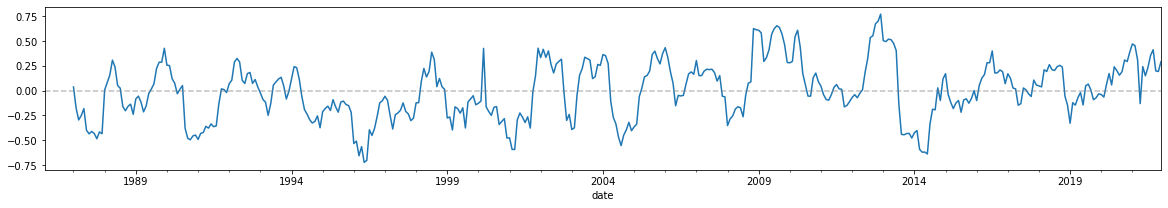

In [8]:
gsneci = clean_series('real', load('data/GSNECI.csv').pct_change())
rolling_corr(wti.join(gsneci).dropna())

### US Field Production

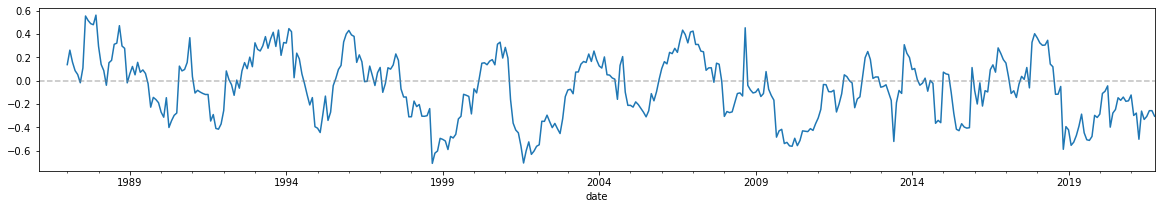

In [9]:
prod = clean_series('production', load('data/US_production.csv').pct_change())
rolling_corr(wti.join(prod).dropna())

### World Petroleum Production

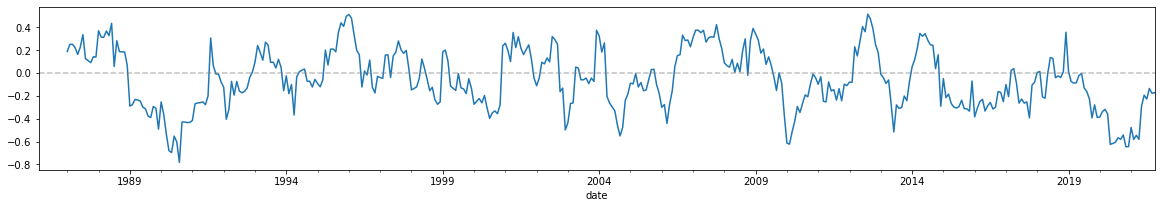

In [10]:
prod = clean_series('production', load('data/Global_production.csv').pct_change())
rolling_corr(wti.join(prod).dropna())

## 4. General Commodity Trends

### GSCI & S&P 500

In [11]:
gsci = clean_series('real', load('data/GSCI.csv').pct_change()).rename(columns={'real': 'gsci'})

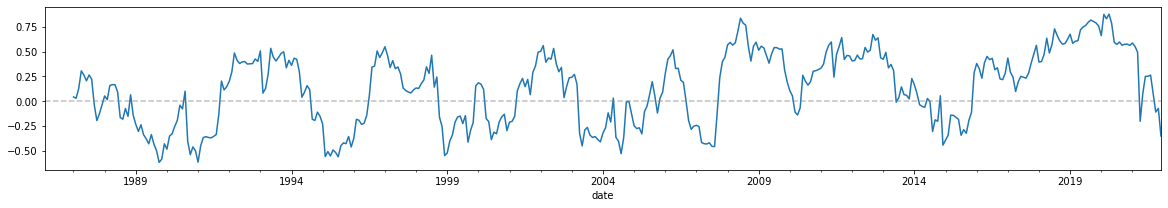

In [12]:
rolling_corr(spx.join(gsci).dropna())

### GSCI & MSCI World

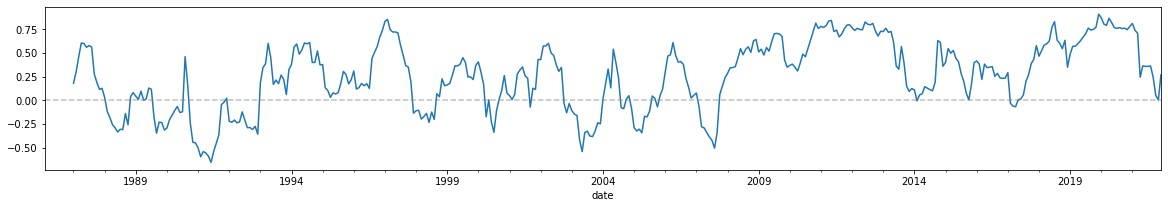

In [13]:
rolling_corr(msci_world.join(gsci).dropna())

### GSCI & MSCI Emerging Markets

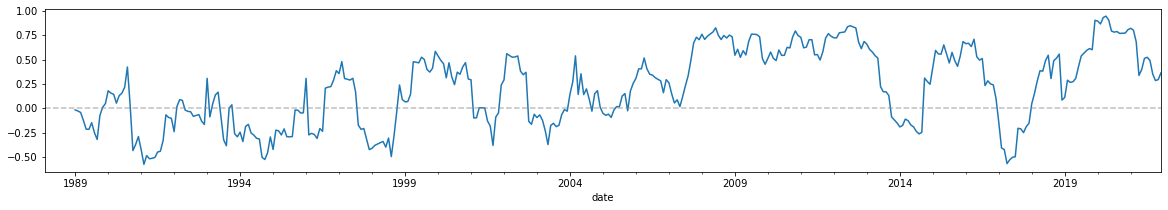

In [14]:
rolling_corr(msci_em.join(gsci).dropna())

### GSNECI & MSCI Emerging Markets

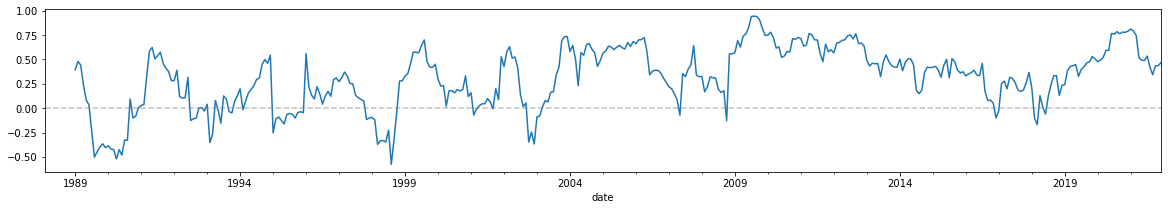

In [15]:
rolling_corr(msci_em.join(gsneci.rename(columns={'real': 'gsneci'})).dropna())

### GSCI Energy & MSCI Emerging Markets

In [16]:
gseci = clean_series('real', load('data/GSCI_energy.csv').pct_change())

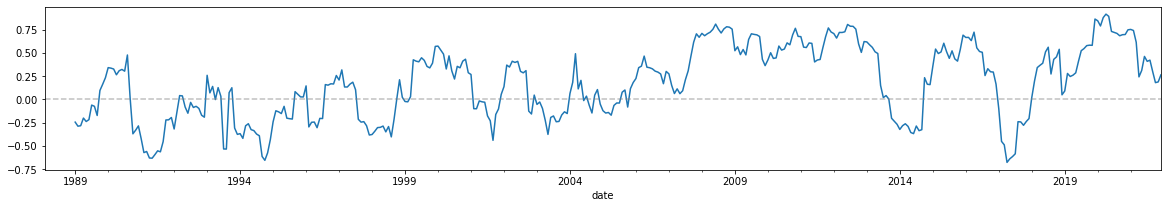

In [17]:
rolling_corr(msci_em.join(gseci.rename(columns={'real': 'gseci'})).dropna())